**Objective**
* EDA and Visualization

----
**Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
sns.set_palette('pastel')

----
Helper Function

In [3]:
# Summarize Numeric Feature
def numeric_summarize(data, x):
    # Get Stats Informations
    mx = data[x].max()
    mn = data[x].min()
    avg = data[x].mean()
    
    print(f"Max = {mx}\nMin = {mn}\nMean = {avg}")
    
    # Plot
    plt.figure(figsize = (10, 7))
    # Box Plot 
    plt.subplot(1, 2, 1)
    sns.boxplot(x = data[x])
    # Dist plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(x = data[x], shade = True)

-------

In [4]:
# Import Data
data = pd.read_csv('bikeshare.csv')

In [5]:
# Show data 
data.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


----
**Data Preprocessing**

In [11]:
# Look For Null Values
feature_name = data.isna().sum().index
feature_null_values = data.isna().sum().values
for (i, j) in zip(feature_name, feature_null_values) :
    if j > 0:
        print(f"`{i}` = {j} Null value")

`start_station_id` = 197 Null value
`start_station_name` = 197 Null value
`end_station_id` = 197 Null value
`end_station_name` = 197 Null value
`member_birth_year` = 8265 Null value
`member_gender` = 8265 Null value
`age` = 8265 Null value


---
**member_birth_year**

Max = 2001.0
Min = 1878.0
Mean = 1984.8064368787361


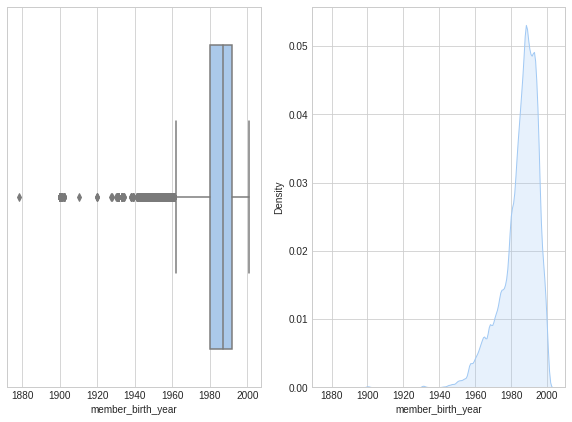

In [12]:
# Summarize this feature
numeric_summarize(data = data, x = 'member_birth_year')

* Alot of outliers and The min age is 144 !! it not logic 

In [13]:
# How many Person is above 70
data[ data['age'] >= 70 ].shape

(1221, 18)

In [14]:
# Drop anyone above 70
data = data[~(data['age'] >= 70)]

In [15]:
# Check that drop is success
data[ data['age'] > 70 ]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Completed,age


Max = 2001.0
Min = 1953.0
Mean = 1985.0914871842049


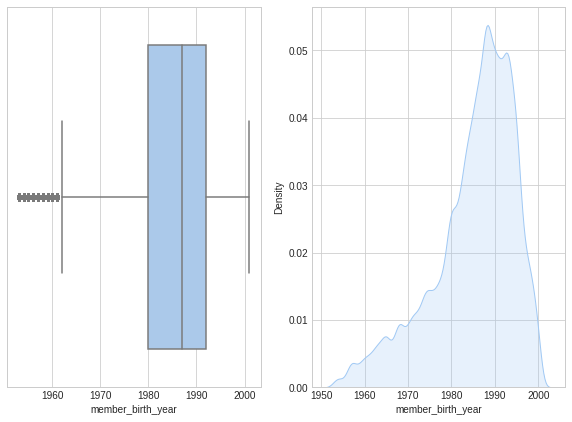

In [16]:
# Show distribution after drop
numeric_summarize(data = data, x = 'member_birth_year')

In [17]:
# We will fill Null Ages with mean
data['age'] = data['age'].fillna(int(data['age'].mean()))

Max = 69.0
Min = 21.0
Mean = 36.86729860421206


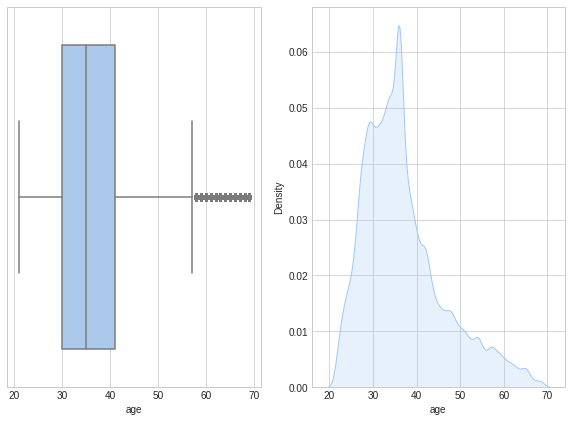

In [18]:
# Let's Look to age distribution now
numeric_summarize(data = data, x = 'age')

In [19]:
# Now we didn't want member_birth_year we will use age instead so we will drop this column
data.drop(['member_birth_year'], axis = 1, inplace = True)

**Observation**
* The Min value is `1878.0` it mean that this person is Live fo 144 and it not logic 
* So We will drop any one whose age is above or equal `70`
* We Have `1032` Person is Above or equal `70` we will drop them

---
## start_time

In [20]:
data.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,Completed,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,Yes,38.0


In [21]:
# Convert Start Time in dataset to type datetime
data['start_time'] = pd.to_datetime(data['start_time'])

In [22]:
data['start_time'] = pd.to_datetime(data['end_time'])

-----
**member_gender**

In [23]:
# How many males and Females is our dataset
data['member_gender'].value_counts()

Male      129646
Female     40678
Other       3602
Name: member_gender, dtype: int64

In [24]:
# If Gender is Other we will map it to Female 
data['member_gender'] = data['member_gender'].apply(lambda x: "Female" if x == "Other" else x)

In [25]:
# Fill null is Gender to female
data['member_gender'] = data['member_gender'].fillna('Female')

In [26]:
# Check That Gender is now contain Males and Females
data['member_gender'].unique()

array(['Male', 'Female'], dtype=object)

In [27]:
# How many male and How many female
data['member_gender'].value_counts()

Male      129646
Female     52545
Name: member_gender, dtype: int64

**After Some Researched I Found that San Francisco have almost 51% Male and 49% Female so we will make our dataset is simulate this observation**
* in our dataset there is `129646` so we will add any other type to female and fill null with females

----
**Feature Engineering**

* Completed: Yes or No 

In [6]:
data.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No


In [7]:
# Generate Fueature
data['Completed'] = data[['start_time', 'end_time']].apply(lambda x: "No" if x['start_time'] == x['end_time'] else "Yes", axis = 1)

In [8]:
# Check that feature Generated Successfully
data['Completed'].unique()

array(['Yes'], dtype=object)

* Age

In [9]:
# Generate Fueature
data['age'] = data['member_birth_year'].map(lambda x : 2022 - x )

In [10]:
# Check that feature Generated Successfully
data['age'].unique()

array([ 38.,  nan,  50.,  33.,  48.,  63.,  39.,  34.,  30.,  26.,  29.,
        32.,  41.,  47.,  44.,  31.,  25.,  36.,  22.,  40.,  27.,  42.,
        49.,  37.,  51.,  43.,  55.,  24.,  28.,  45.,  23.,  35.,  53.,
        59.,  46.,  58.,  57.,  61.,  54.,  56.,  60.,  68.,  64.,  62.,
        52.,  66.,  65.,  77., 122.,  70.,  74.,  71.,  81.,  72.,  73.,
        69.,  67.,  76.,  75.,  91.,  79.,  80., 102.,  89.,  21., 144.,
       121.,  78.,  94.,  88.,  83.,  92., 120., 112.,  84.,  95.])

* Day

In [28]:
data['day'] = data['start_time'].dt.day

* Area 
    * We Have 4 Main Area we will classify them based on Latt and Long

In [29]:
# Let's concat two Features (Long, Latt) to generate Area
def generate_area(lat, long):
    if (long < -121.9 and lat < 37.5 and lat > 37.36):
        return "Area 2"
    elif (lat < 37.4):
        return "Area 1"
    elif (lat > 37.5 and long > -122.3):
        return "Area 3"
    else:
        return "Area 4"
data['area'] = data[['start_station_latitude', 'start_station_longitude']].apply(lambda x: generate_area(x['start_station_latitude'], x['start_station_longitude']), axis = 1)

----
# EDA

In [30]:
# Get Completed Trips
completed_trips = data[ data['Completed'] == 'Yes' ]

In [31]:
# Show some information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182191 entries, 0 to 183411
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             182191 non-null  int64         
 1   start_time               182191 non-null  datetime64[ns]
 2   end_time                 182191 non-null  object        
 3   start_station_id         181994 non-null  float64       
 4   start_station_name       181994 non-null  object        
 5   start_station_latitude   182191 non-null  float64       
 6   start_station_longitude  182191 non-null  float64       
 7   end_station_id           181994 non-null  float64       
 8   end_station_name         181994 non-null  object        
 9   end_station_latitude     182191 non-null  float64       
 10  end_station_longitude    182191 non-null  float64       
 11  bike_id                  182191 non-null  int64         
 12  user_type       

In [32]:
print(f"There is ({len(data.columns)}) Feature (9) Numeric and (8) object")

There is (19) Feature (9) Numeric and (8) object


In [33]:
# Show data
data.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,Completed,age,day,area
0,52185,2019-03-01 08:01:55.975,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,Yes,38.0,1,Area 4
1,42521,2019-03-01 06:42:03.056,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,Female,No,Yes,36.0,1,Area 4
2,61854,2019-03-01 05:24:08.146,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,Male,No,Yes,50.0,1,Area 4
3,36490,2019-03-01 04:02:36.842,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,Female,No,Yes,33.0,1,Area 4
4,1585,2019-03-01 00:20:44.074,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Male,Yes,Yes,48.0,1,Area 3


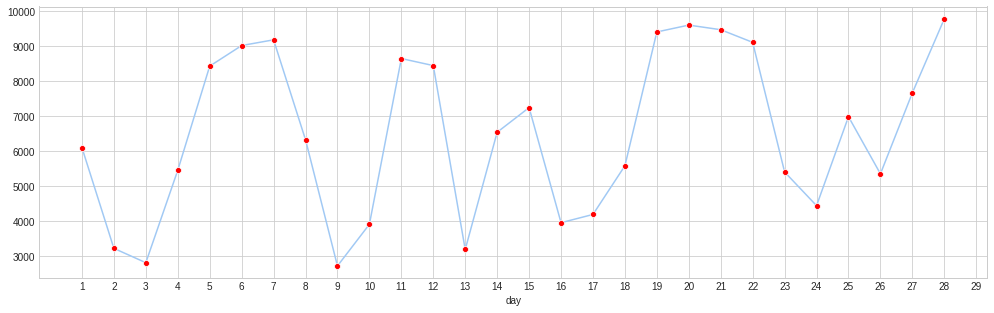

In [34]:
# Number of Trips VS Day
day_vs_trips = completed_trips.groupby('day').count()['duration_sec']
plt.figure(figsize=(17, 5))
sns.lineplot(x = day_vs_trips.index, y = day_vs_trips.values, marker = 'o', markerfacecolor = 'red')
plt.xticks(range(1, 30));

* It seem that Some day's in Month the Frequency of trip goes to the max

In [62]:
# What is the Frequency of each Area ?
trips_in_each_area = data['area'].value_counts().to_frame()
trips_in_each_area

,area
Area 4,132789
Area 3,41151
Area 1,8054
Area 2,197


**Observations**
* Day `28` of month has the max Number of trips
* Number of trips in week end Increase
* Area 4 have the Max Number of Trips
* Area 2 have the min Number of Trips

---
## duration_sec

In [36]:
# Which Trip has the max Duration ?
data[ data['duration_sec'] == data['duration_sec'].max()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,Completed,age,day,area
101361,85444,2019-02-14 17:43:59.954,2019-02-14 17:43:59.9540,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,98.0,Valencia St at 16th St,37.765052,-122.421866,6168,Subscriber,Female,No,Yes,36.0,14,Area 4


<AxesSubplot:xlabel='user_type', ylabel='count'>

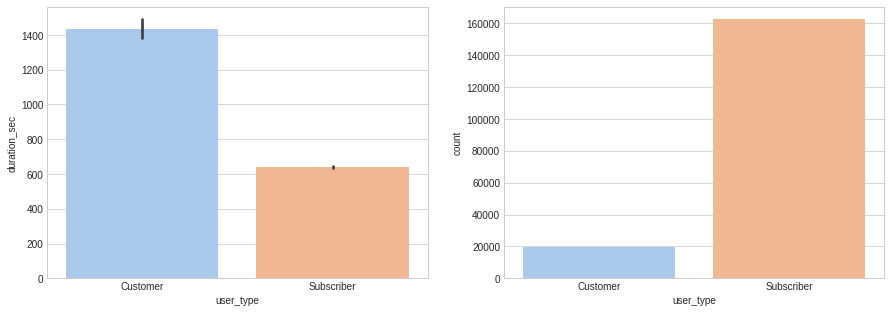

In [37]:
# The Duration of Trip VS user_type
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)

sns.barplot(x = completed_trips['user_type'], y = completed_trips['duration_sec'])

plt.subplot(1, 2, 2)

# Number of Customers VS Number of Subscribers
sns.countplot(x = completed_trips['user_type'])

* Customers Make an avreage duration seconds More than Customers 

In [38]:
# The Duration of Trip VS user_type in Numbers
completed_trips['duration_sec'].groupby(completed_trips['user_type']).mean()

user_type
Customer      1432.255921
Subscriber     639.951924
Name: duration_sec, dtype: float64

<AxesSubplot:xlabel='member_gender', ylabel='count'>

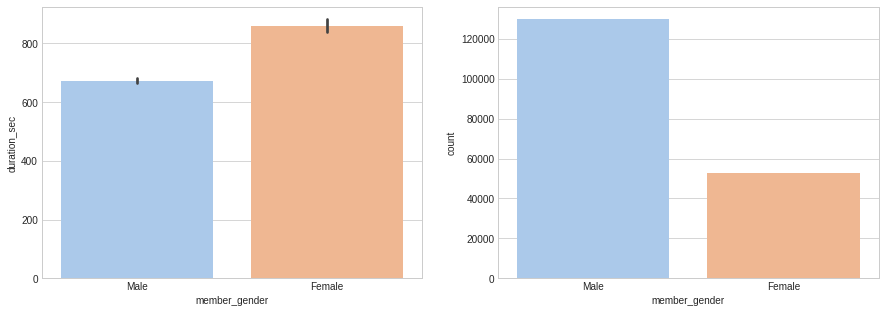

In [39]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)

# The Duration of Trip VS gender
sns.barplot(x = completed_trips['member_gender'], y = completed_trips['duration_sec'])

plt.subplot(1, 2, 2)

# Number of Males VS Number of Females
sns.countplot(x = completed_trips['member_gender'])

* Female Make Average Duration More than Males

In [40]:
# The Duration of Trip VS user_type in Numbers
completed_trips['duration_sec'].groupby(completed_trips['member_gender']).mean()

member_gender
Female    858.668722
Male      672.328718
Name: duration_sec, dtype: float64

<AxesSubplot:xlabel='bike_share_for_all_trip', ylabel='duration_sec'>

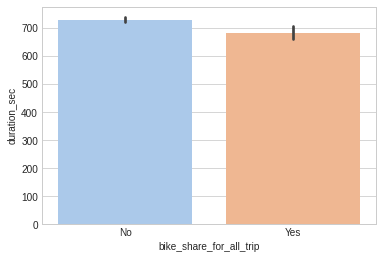

In [41]:
# Whos is greater average non-subscribers or subscribers ?
sns.barplot(x = completed_trips['bike_share_for_all_trip'], y = completed_trips['duration_sec'])

* People who not subscribe on bike share programme make Average Duration more than Subscribers

Text(0.5, 1.0, 'Duration VS Age')

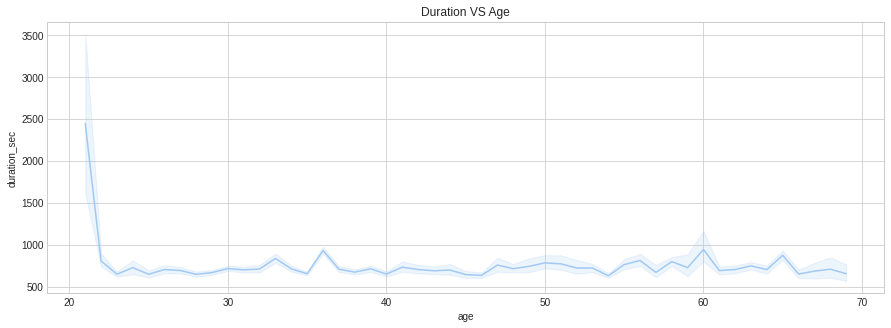

In [42]:
# Is Duration has relationship with Age
plt.figure(figsize = (15, 5))
sns.lineplot(x = completed_trips['age'], y = completed_trips['duration_sec'])
plt.title("Duration VS Age")

Is Duration has relationship with Age ?
* No There is no relationship between Duration and Age

<AxesSubplot:title={'center':'Duration Seconds VS Female'}, xlabel='age', ylabel='duration_sec'>

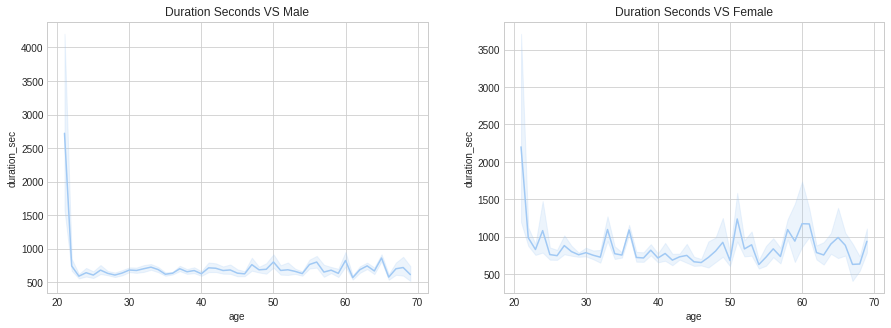

In [43]:
# Is Duration has relationship with Age For Males and Females
males = completed_trips[completed_trips['member_gender'] == "Male"]
females = completed_trips[completed_trips['member_gender'] == "Female"]
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.title("Duration Seconds VS Male")
sns.lineplot(x = males['age'], y = males['duration_sec'])
plt.subplot(1, 2, 2)
plt.title("Duration Seconds VS Female")
sns.lineplot(x = females['age'], y = females['duration_sec'])

Is Duration has relationship with Age For Males and Females ?
* No

Text(0.5, 1.0, 'Duration VS Age Based on Share for all')

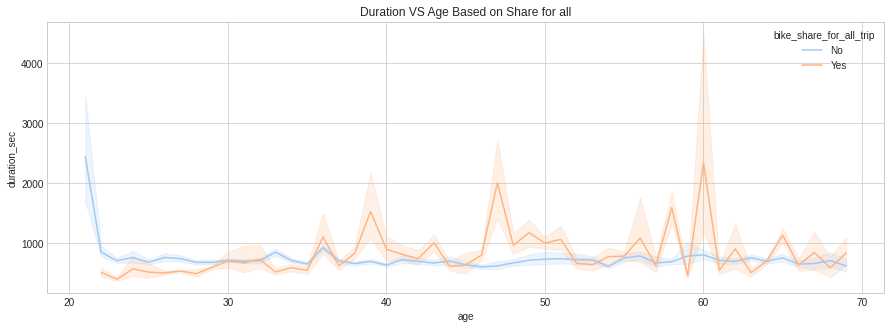

In [44]:
# The Duration VS Age Depend on bike_share_for_all_trip
plt.figure(figsize = (15, 5))
sns.lineplot(x = completed_trips['age'], y = completed_trips['duration_sec'], hue = data['bike_share_for_all_trip'])
plt.title("Duration VS Age Based on Share for all")

The Duration VS Age Depend on bike_share_for_all_trip ?
* Yes Subscriber People make Duration More than not subscriber when age become greater

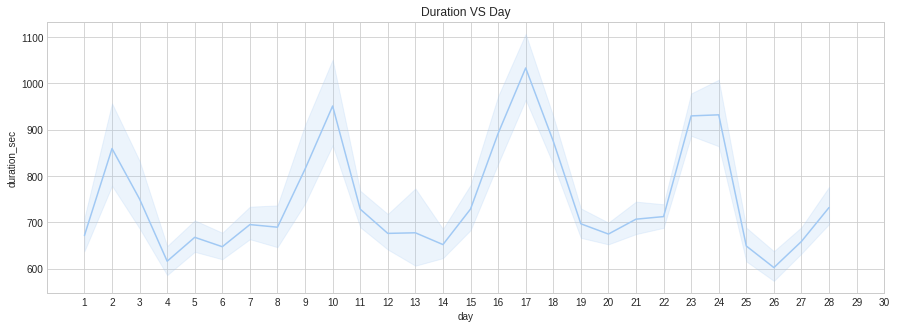

In [115]:
# Is There Relation Between Duration and Day ?
plt.figure(figsize = (15, 5))
plt.title("Duration VS Day")
sns.lineplot(x = completed_trips['day'], y = completed_trips['duration_sec'])
plt.xticks(range(1, 31));

Is There Relation Between Duration and Day ?
* Yes, Some day's Duration hit the max

<AxesSubplot:title={'center':'Duration VS Day'}, xlabel='day', ylabel='duration_sec'>

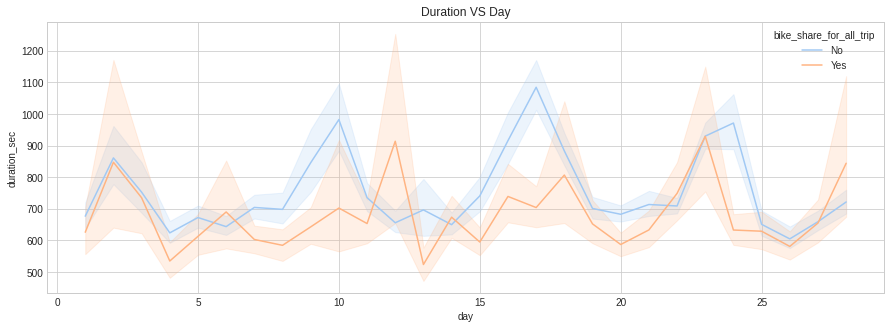

In [46]:
# Is the max Duration Hit by People who enroll in Bike share or not ?
plt.figure(figsize = (15, 5))
plt.title("Duration VS Day")
sns.lineplot(x = completed_trips['day'], y = completed_trips['duration_sec'], hue = completed_trips['bike_share_for_all_trip'])

**Observation**
* The Max Duration Start From `5.0` Statin and end on `98.0` 
* Average Duration for Customers `(1433.2)` is greater than Average Duration of Subscriber `(639.8)`.However, Number of Customers is less than Number of Subscribers
* Average Duration of Females `(858.6)` is greater than Average Duration of Males `(672.0)`
* People Who Not Enrolled in Bike share for All make Average Trips More that Enrolled
* There is No Strong Relation between Age and Duration but people less than 35 Make The Highst Duration
* Older Females take Duration More than Males
* The Most Duration and Subscribe in Share Programe is Older People
* The Duration between Day 15 and 20 Hit the max duration 
* Max Duration is hit by not subscribers in Bike Share Programme

---
## start_station_id

In [47]:
data.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,Completed,age,day,area
0,52185,2019-03-01 08:01:55.975,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,Yes,38.0,1,Area 4
1,42521,2019-03-01 06:42:03.056,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,Female,No,Yes,36.0,1,Area 4


In [48]:
# Which Station has the max number of trips ?
completed_trips['start_station_id'].value_counts().to_frame(name = "count")

,count
58.0,3899
67.0,3491
81.0,3017
21.0,2881
3.0,2742
...,...
301.0,9
51.0,7
224.0,4
300.0,4


In [49]:
# Where is Station 58.0
max_station = completed_trips[completed_trips['start_station_id'] == 58]
max_station.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,Completed,age,day,area
38,1066,2019-02-28 23:49:02.792,2019-02-28 23:49:02.7920,58.0,Market St at 10th St,37.776619,-122.417385,145.0,29th St at Church St,37.743684,-122.426806,5938,Subscriber,Female,No,Yes,30.0,28,Area 4
54,401,2019-02-28 23:37:33.955,2019-02-28 23:37:33.9550,58.0,Market St at 10th St,37.776619,-122.417385,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,5407,Subscriber,Female,No,Yes,32.0,28,Area 4


In [50]:
# What is Average Duration in this station ?
max_station['duration_sec'].mean()

657.5021800461657

In [51]:
# Where is the Place that users always go to from station 58
max_station['end_station_id'].value_counts()

21.0     272
3.0      247
67.0     239
5.0      139
44.0     131
        ... 
137.0      1
108.0      1
364.0      1
386.0      1
130.0      1
Name: end_station_id, Length: 146, dtype: int64

**Observation**
* Station Number `58` has the max number of trips `3899` trip with average duration `657` and it located at `Market St at 10th St`
* Station Number 344 has the min number of trips `2` trip
* Most Trips go to station 
    * 21
    * 3
    * 67

-----
### `start_station_latitude` with `start_station_longitude`

In [52]:
data.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,Completed,age,day,area
0,52185,2019-03-01 08:01:55.975,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,Yes,38.0,1,Area 4
1,42521,2019-03-01 06:42:03.056,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,Female,No,Yes,36.0,1,Area 4


<AxesSubplot:xlabel='start_station_latitude', ylabel='start_station_longitude'>

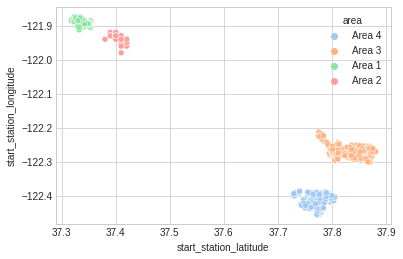

In [53]:
# How many Station did we have ?
sns.scatterplot(x = data['start_station_latitude'], y = data['start_station_longitude'], hue = data['area'])

* There is 4 Diferrent Area

<AxesSubplot:xlabel='area', ylabel='duration_sec'>

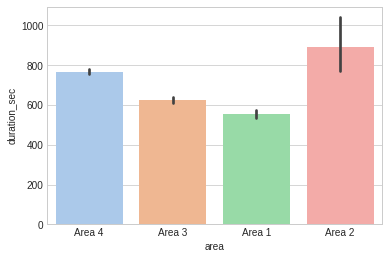

In [54]:
# Wich Area make the best Duration ?
sns.barplot(x = data['area'], y = data['duration_sec'])

**Observation**
* We have `4` main Areas We divide them from `Area 1 to Area 4`
* Area `2` make the highst average Duration

-----
## bike_id

In [57]:
# How many bikes did we have ?
data['bike_id'].nunique()

4646

In [87]:
# How many bikes in each Area ?
bikes_in_each_area = data['bike_id'].groupby(data['area']).nunique().to_frame()
bikes_in_each_area.sort_index(inplace = True)
bikes_in_each_area

,bike_id
area,
Area 1,515
Area 2,28
Area 3,1804
Area 4,2332


In [88]:
# Sort Trips by index to match area
trips_in_each_area.sort_index(inplace = True)
trips_in_each_area

,area
Area 1,8054
Area 2,197
Area 3,41151
Area 4,132789


Text(0, 0.5, 'Number of Trips in each Area')

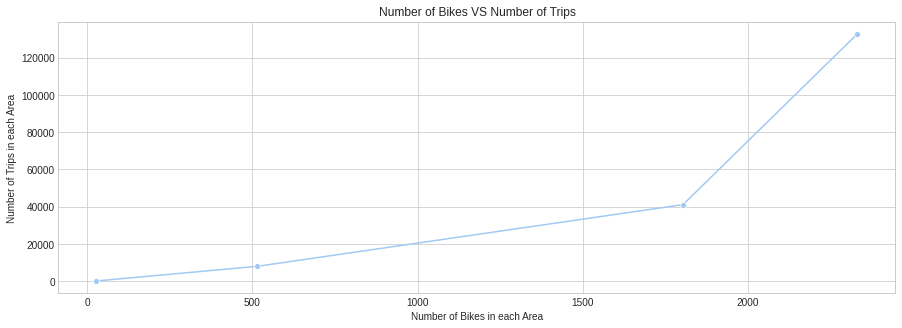

In [114]:
# There is A relation between bike numbers and number of trips ??
plt.figure(figsize=(15, 5))
sns.lineplot(y = trips_in_each_area['area'], x = bikes_in_each_area['bike_id'], marker = 'o')
plt.title("Number of Bikes VS Number of Trips")
plt.xlabel("Number of Bikes in each Area")
plt.ylabel("Number of Trips in each Area")

**Observation**
* We have 4646 Bikes 
* Area 4 Has The max Number of bikes `2332` bike
* Number of Trips depend on Number of bikes There is Positive corr between them 